In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Add, BatchNormalization, Input, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications.resnet50 import ResNet50

In [6]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [4]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog',
         'horse','ship','truck']

In [9]:
resnet50 = ResNet50()

In [10]:
plot_model(resnet50, show_layer_names=True, show_trainable=True)

In [11]:
resnet50.trainable = False

In [12]:
plot_model(resnet50, show_layer_names=True, show_trainable=True)

In [34]:
resnet50 = ResNet50(include_top=False, input_shape=(32,32,3))

In [35]:
resnet50.trainable = False

In [36]:
plot_model(resnet50, show_layer_names=True, show_trainable=True)

In [39]:
# add the flatten layer
flattened = Flatten()(resnet50.output)

# fully connected layer
fc1 = Dense(256, activation='relu', name='AddedDense1')(flattened)

# fully connected layer
fc2 = Dense(10, activation='softmax', name='AddedDense2')(fc1)

In [40]:
model = Model(inputs=resnet50.inputs, outputs=fc2)

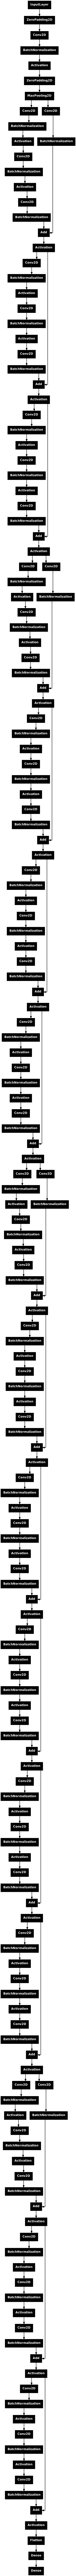

In [45]:
plot_model(model)

In [46]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [47]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10


/home/mitu/.local/lib/python3.10/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_711']
Received: inputs=Tensor(shape=(None, 32, 32, 3))
  warnings.warn(msg)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 227s 141ms/step - accuracy: 0.5136 - loss: 1.4917
Epoch 2/10
1377/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 128ms/step - accuracy: 0.6280 - loss: 1.0475

KeyboardInterrupt: 